<a href="https://colab.research.google.com/github/KampHost/caldiss/blob/master/MachineLearning_AKH_ipymb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio Unsupervised and Supervised Machine Learning


# Assignment 1
## Unsupervised Machine Learning
- Prepare the dataset (select the columns that are useful)
- Preprocess
- Reduce dimensionality and perhaps make a scatterplot of the data
- Examine the reduced data

##Preamble

In [0]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


!pip install -qq -U matplotlib
import matplotlib.pyplot as plt # standard plotting library
import numpy as np #Numpy for linear algebra & co
import seaborn as sns # For pretty dataviz
sns.set_style("darkgrid") # Define style for dataviz

## Getting and preparing data

In [0]:
turnover = pd.read_csv('https://github.com/CALDISS-AAU/sdsphd19_coursematerials/raw/master/data/turnover.csv')

In [0]:
#Datainspection
turnover.info()

#converting the two string variables, salary, and department, into integers.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction            14999 non-null float64
evaluation              14999 non-null float64
number_of_projects      14999 non-null int64
average_montly_hours    14999 non-null int64
time_spend_company      14999 non-null int64
work_accident           14999 non-null int64
churn                   14999 non-null int64
promotion               14999 non-null int64
department              14999 non-null object
salary                  14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [0]:
#Datainspection
turnover

In [0]:
#Inspection of values in the variable salary
turnover.salary.value_counts(normalize=True)

low      0.488
medium   0.430
high     0.082
Name: salary, dtype: float64

In [0]:
#String to integer
salary_int = {'low':0, 'medium':1, 'high':2}

In [0]:
#Attach integer
turnover['salary'] = turnover.salary.map(salary_int)

In [0]:
#Inspection of values in the variable department
turnover.department.value_counts(normalize=True)

In [0]:
#Create dummy variables from the categories in the variable department
dep_matrix = pd.get_dummies(turnover.department)

In [0]:
#Attach integers
data = pd.concat([turnover, dep_matrix], axis = 1)

In [0]:
#Drop irrelevant variables
data.drop(['department', 'salary', 'churn'], axis=1, inplace=True)

In [0]:
data

In [0]:
##mean standardizing the variables
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [0]:
#Datainspection
pd.DataFrame(data_scaled, columns = data.columns).describe()


,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
count,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000
mean,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.103,-2.080,-1.463,-2.103,-1.026,-0.411,-0.147,-0.298,-0.235,-0.232,-0.228,-0.209,-0.246,-0.253,-0.617,-0.418,-0.471
25%,-0.695,-0.912,-0.652,-0.902,-0.341,-0.411,-0.147,-0.298,-0.235,-0.232,-0.228,-0.209,-0.246,-0.253,-0.617,-0.418,-0.471
50%,0.109,0.023,0.160,-0.021,-0.341,-0.411,-0.147,-0.298,-0.235,-0.232,-0.228,-0.209,-0.246,-0.253,-0.617,-0.418,-0.471
75%,0.833,0.899,0.971,0.880,0.344,-0.411,-0.147,-0.298,-0.235,-0.232,-0.228,-0.209,-0.246,-0.253,1.620,-0.418,-0.471
max,1.557,1.659,2.594,2.182,4.453,2.432,6.784,3.350,4.250,4.308,4.393,4.776,4.060,3.953,1.620,2.394,2.125


#### Dimensionality Reduction using Principal Component Analysis (PCA)

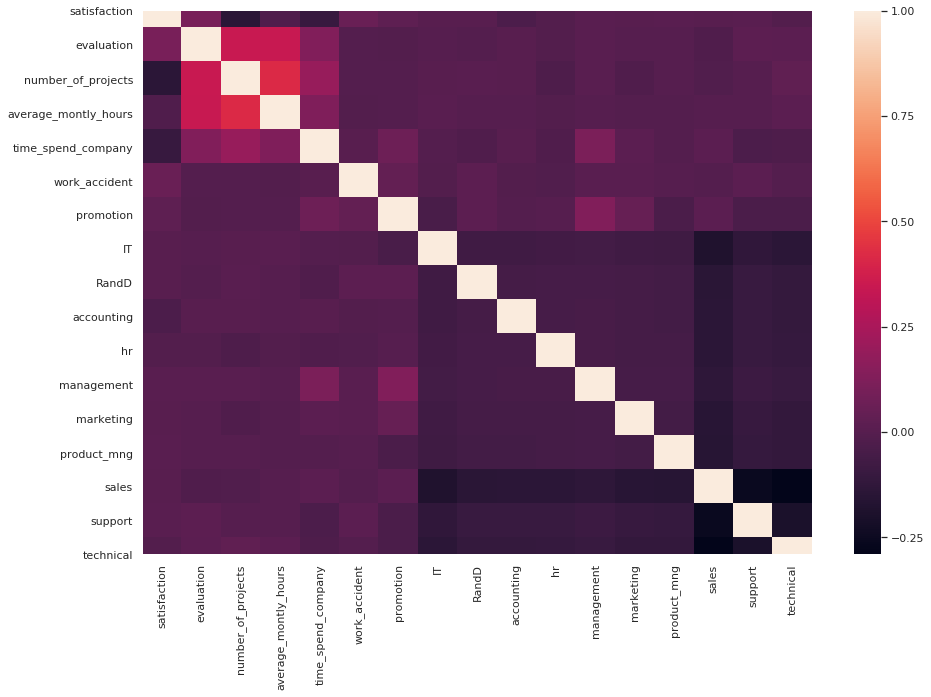

In [0]:
#correlation plot
sns.heatmap(data.corr())

## The data seem highly uncorrelated - expect to find no PCs

In [0]:
# Sns pairplot on continuous variables - a matrix with scatters on the triangles, and the distribution on the diagonal
subdata=data[['satisfaction','evaluation','number_of_projects','average_montly_hours','time_spend_company']]
sns.pairplot(subdata)

In [0]:
# Initialize a model - selection number of components
model = PCA(n_components = 3)

In [0]:
# Fit the model
model.fit(data_scaled)

#### Exploring the Principal Components

In [0]:
# How much variance is explained by the 3 components (Eigenvalue)
model.explained_variance_

array([1.83623533, 1.33060534, 1.22266748])

In [0]:
# Transform the original data
data_reduced = pca.fit_transform(data_scaled)

In [0]:
plot_data = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

In [0]:
# Scatter plot of the first 2 componentws
sns.scatterplot(x = data_reduced[:,0], y = data_reduced[:,1])
plt.axis('equal')
plt.show()

In [0]:
# Get the mean of the grain samples: mean
mean = model.mean_
# Get the first principal component: first_pc
first_pc = model.components_[0,:]
second_pc = model.components_[1,:]
# Make a scatter plot of the untransformed points
plt.scatter(data_scaled[:,0], data_scaled[:,1])
# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)
plt.arrow(mean[0], mean[1], second_pc[0], second_pc[1], color='green', width=0.01)
# Keep axes on same scale
plt.axis('equal')
plt.show()

#As exspected dimension reduction does not make much sense for the current data

#Assignment 2
## Supervised Machine Learning
- Preprocess the data
- Try to predict "churn" using a simple model (Logistic Regression)
- Try a more advanced model (e.g. Random Forest)
- Evaluate your model
- Predict "satisfaction" (!!! This is a regression model)
- Evaluate the regression model

## Preamble

In [0]:
# Import modules that we are going to use for all models
# Load and instantiate a LabelEncoder that will turn our text labels (regions into indices)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# Import K-fold crossvalidation
from sklearn.model_selection import cross_val_score
# Import Classification Report for later evaluatoion of performance
from sklearn.metrics import classification_report
# Import StandardScaler
from sklearn.preprocessing import StandardScaler
# Random state defined with an arbitrary number for reproducibility
from sklearn.model_selection import train_test_split
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# For that we need to install an updated version of the MLxtend library (it will make plotting of the confusion matrix easy)
!pip install -qq -U mlxtend

# Import the confusion matrix plotter module
from mlxtend.plotting import plot_confusion_matrix
# We will also import sklearns confusion matrix module that will make it easy to produce a confusion matrix
# It's actually just a cross-tab of predicted vs. real values
from sklearn.metrics import confusion_matrix
# Import Random Forrest
from sklearn.ensemble import RandomForestClassifier


##Getting and preparing data

In [0]:
# Select the (independant) features that we are going to use to train the model
turnover = pd.read_csv('https://github.com/CALDISS-AAU/sdsphd19_coursematerials/raw/master/data/turnover.csv')
salary_mapper = {'low':0, 'medium':1, 'high':2}
turnover['salary_recode'] = turnover.salary.map(salary_mapper)
turnover.department.value_counts(normalize=True)
dep_matrix = pd.get_dummies(turnover.department)
X = pd.concat([turnover, dep_matrix], axis = 1)
X.drop(['department', 'salary','support','churn'], axis=1, inplace=True)
# Instantiate a StandardSclaer 
scaler = StandardScaler()
# Apply the scaler to our X-features
X_scaled = scaler.fit_transform(X)

In [0]:
# Define the dependant variabel / target to predict (world region)
turnover = pd.read_csv('https://github.com/CALDISS-AAU/sdsphd19_coursematerials/raw/master/data/turnover.csv')
y = turnover.churn

In [0]:
# Transform labels into indices by passing y to the encoder
y_enc = encoder.fit_transform(y)

In [0]:
# Split the data using the train_test_split module. We keep 20% of the data for testing and use 80% to train the model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_enc, test_size = 0.2, random_state = 42)

##Predicting "churn" using logistic regression

###Model Estimation

In [0]:
#instantiate the model
model = LogisticRegression()
# K-fold cross-validation (splitting the 80% into 5 chunks, using 4 to train and 1 to evaluate)
scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)
# Model training
model.fit(X_train, y_train)
# Model performance on the test-set
print(model.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

[0.78916667 0.795      0.79416667 0.8025     0.78449354]
0.7886666666666666


The overall accuracy is 79%

### Model Evaluation

In [0]:
# Performance evaluation using the classification_report
target_names = encoder.inverse_transform(list(set(y_test))) # get real region names back using inverse_transform
y_pred = model.predict(X_test) # predict from the testset
print(classification_report(y_test, y_pred, target_names = target_names)) #Print out the report

In [0]:
# Visual evaluation:
#calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 
# Plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                hide_spines = True,
                                class_names = target_names)

The model is not getting about 64 pct. of the actual churn right!

##Predicting "churn" using Random Forrest

###Model Estimation

In [0]:
model = RandomForestClassifier()
scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

The overall performance goes up (as expected).
The test-score is well within the values produced in the crossvalidation 

###Model Evaluation

In [0]:
# Performance evaluation using the classification_report
target_names = encoder.inverse_transform(list(set(y_test))) # get real region names back using inverse_transform
y_pred = model.predict(X_test) # predict from the testset
print(classification_report(y_test, y_pred, target_names = target_names)) #Print out the report

In [0]:
# Performance evaluation using the classification_report
target_names = encoder.inverse_transform(list(set(y_test))) # get real region names back using inverse_transform
y_pred = model.predict(X_test) # predict from the testset
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 
# Plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names = target_names)


The model is better at classifying individuals in risk of leaving the company